In [11]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train[0])

170500096/170498071 [==============================] - 183s 1us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


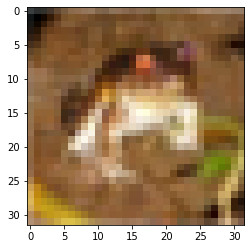

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
img = plt.imshow(x_train[0])

In [13]:
print('The label is:', y_train[0])

The label is: [6]


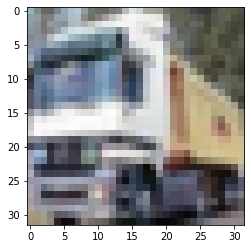

In [14]:
img = plt.imshow(x_train[1])

In [15]:
print('The label is:', y_train[1])

The label is: [9]


In [16]:
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [17]:
print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [18]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [19]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
model = Sequential()

In [21]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))

In [22]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

In [23]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [24]:
model.add(Dropout(0.25))

In [25]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [26]:
model.add(Flatten())

In [27]:
model.add(Dense(512, activation='relu'))

In [28]:
model.add(Dropout(0.5))

In [29]:
model.add(Dense(10, activation='softmax'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 176s 140ms/step - loss: 1.6056 - accuracy: 0.4146 - val_loss: 1.2080 - val_accuracy: 0.5630
Epoch 2/20
1250/1250 [==============================] - 203s 163ms/step - loss: 1.1885 - accuracy: 0.5709 - val_loss: 1.0582 - val_accuracy: 0.6270
Epoch 3/20
1250/1250 [==============================] - 175s 140ms/step - loss: 1.0268 - accuracy: 0.6357 - val_loss: 0.9627 - val_accuracy: 0.6577
Epoch 4/20
1250/1250 [==============================] - 184s 147ms/step - loss: 0.9352 - accuracy: 0.6690 - val_loss: 0.8503 - val_accuracy: 0.6975
Epoch 5/20
1250/1250 [==============================] - 183s 146ms/step - loss: 0.8590 - accuracy: 0.6971 - val_loss: 0.8180 - val_accuracy: 0.7153
Epoch 6/20
1250/1250 [==============================] - 173s 138ms/step - loss: 0.7992 - accuracy: 0.7183 - val_loss: 0.8055 - val_accuracy: 0.7174
Epoch 7/20
1250/1250 [==============================] - 170s 136ms/step - loss: 0.7590 - accuracy: 0.7308 - val_

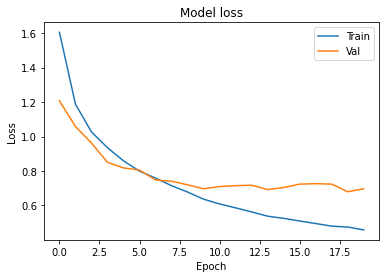

In [33]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

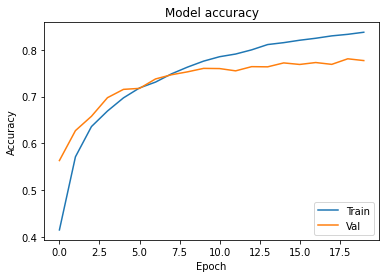

In [35]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [36]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 8s 26ms/step - loss: 0.7470 - accuracy: 0.7619


0.761900007724762

In [37]:
model.save('my_cifar10_model.h5')

In [38]:
my_image = plt.imread("/Users/mrojsutivat/Documents/COD Advanced Python/cat.jpg")

In [39]:
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))

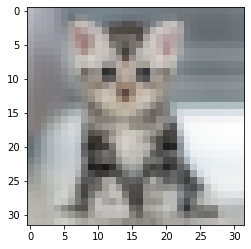

In [40]:
img = plt.imshow(my_image_resized)

In [41]:
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

In [42]:
print(probabilities)

[[1.1979138e-02 4.4886110e-05 9.6474811e-02 1.2562370e-01 2.4591425e-01
  4.3382108e-01 1.5737271e-02 6.7356169e-02 2.9469349e-03 1.0177159e-04]]


In [43]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: dog -- Probability: 0.43382108
Second most likely class: deer -- Probability: 0.24591425
Third most likely class: cat -- Probability: 0.1256237
Fourth most likely class: bird -- Probability: 0.09647481
Fifth most likely class: horse -- Probability: 0.06735617
